# Telco Customer Churn Prediction Project

Did you know that attracting a new customer costs five times as much as keeping an existing one?

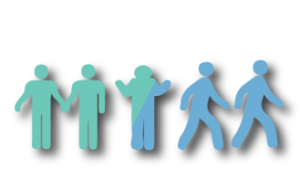

## Introduction

<b>What is Customer Churn?</b>

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


<b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b>
To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


## Dataset Description

The raw data contains 7043 rows (customers) and 21 columns (features).

* customer ID: Customer ID
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)

## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
sns.color_palette("husl", 8)

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## Loading the data

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Understanding the data

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data set includes information about:

* <b>Customers who left within the last month</b> – the column is called Churn

* <b>Services that each customer has signed up for</b> – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* <b>Customer account information</b> - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* <b>Demographic info about customers</b> – gender, age range, and if they have partners and dependents

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From the above information, we can understand
* There are no null values in all the colums
* There are many columns with object data type, i.e, categorial features

## Data preprocessing

<b>customerID</b> is not going to be helpful in prediction whether the customer will churn or not. So,we can drop customerID column

In [9]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Encoding

<b>Encoding</b> is a technique of <b>converting categorical variables into numerical values</b> so that it could be easily fitted to a machine learning model.

In [10]:
def get_uniques(df, columns):
    '''
    Returns dict with key as column and value as list of unique values present in the column.
    '''
    return { column : list(df[column].unique()) for column in columns }

In [11]:
def get_categorical_columns(df):
    '''
    Returns list of categorical columns in the given dataset.
    '''
    return [ column for column in df.columns if df.dtypes[column] == 'object' ]

In [12]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

From above output, we can observe <b>TotalCharges attribute which is of type object (string) but the actual values are floating point</b>. So, we have to change the data type of TotalCharges column.

In [13]:
# changing TotalCharges attribute dataset into floating point
# df['TotalCharges'].astype(np.float64)  # generates an error

In [14]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
sorted(df['TotalCharges'].unique())

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

If we notice, in the above output we have an empty string, which basically means means unknown value or Null value. So, we have to replace it Null or Nan value.

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)

In [17]:
# changing TotalCharges attribute dataset into floating point
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)  # Now it works!

df['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

So, now that we have replaced empty string with Null value and changed the data type of TotalCharges column. Let's count the Null values

In [18]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From above output, we can see there are <b>11 Null values in TotalCharges column</b>.

So, Let's <b>replace the Null values with Mean</b> of the column.

In [19]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [20]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now, we don't have any Null values in our data frame.

Let's take a look at the unique values in columns.

In [21]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

From the above output, we can observe:
* The TotalCharges column is no longer in the output, which means its not a categorical column, i.e, numerical column.
* For some attibutes like <b>MultipleLines, OnlineSecurity, OnlineBackup</b> etc..., they have values like <b>No phone services and No internet service<b/> which is same as <b>No</b>
    
Let's replace No phone services and No internet service, with No.

In [22]:
# Columns with 'No phone service'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

# Columns with 'No internet service'
no_internet_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in no_internet_columns:
    df[column] = df[column].replace('No internet service', 'No')

In [23]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

We have successfully replaced No phone services and No internet service with No and now they are Truely Binary.

Next step is to encode the columns. For that, first let's divide the columns into 3 categories:
* Binary features => Binary data is discrete data that can be in only one of two categories — either yes or no, 1 or 0, off or on, etc.
* Ordinal features => Ordinal data are discrete integers that can be ranked or sorted.
* Nominal features => Nominal data is made of discrete values with no numerical relationship between the different categories.

In [24]:
# Let's rename gender -> Gender. So, we have all the columns in CamelCase
df = df.rename(columns = {'gender': 'Gender', 'tenure': 'Tenure'})
get_uniques(df, get_categorical_columns(df)) # Checking

{'Gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [25]:
# Classifying columns into three feature types to easily encode them
binary_features = ['Gender', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling'
                  ]

ordinal_features = ['InternetService', 'Contract']

nominal_features = ['PaymentMethod']

target_column = 'Churn'

Let's define a ordering to ordinal features

In [26]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

In [27]:
def binary_encode(df, column, positive_value):
    '''
        Returns a new dataframe by changing given column values to 1 and 0s
        based on the codition, if they are equal to positive then 1 else 0.
    '''
    df = df.copy()
    df[column] = df[column].apply(lambda x : 1 if x == positive_value else 0)
    return df 

def ordinal_encode(df, column, ordering):
    '''
        Returns a new dataframe by Assgining numeric values to the actual values
        for given column based on the given ordering.
    '''
    df = df.copy()
    df[column] = df[column].apply(lambda x : ordering.index(x))
    return df 

def onehot_encode(df, column):
    '''
        Returns a new dataframe, by adding new columns based on the values of the given column, 
        it gives value 1 to new column for the record with that value else 0
    '''
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1)
    return df

In [28]:
# All the binary features have Yes or No values except Gender (Yes or No), So let's do it separately
df = binary_encode(df, 'Gender', 'Male')

for feature in binary_features[1:]:
    df = binary_encode(df, feature, 'Yes')

df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [29]:
# Encoding ordinal features
df = ordinal_encode(df, 'InternetService', internet_ordering)
df = ordinal_encode(df, 'Contract', contract_ordering)

df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,No
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,Yes


In [30]:
# Encoding Nominal Encoding
for feature in nominal_features:
    df = onehot_encode(df, feature)

df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,No,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,No,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,Yes,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,No,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,Yes,0,0,1,0


In [31]:
# Now, we have only one Binary feature, which is our Target feature, Churn. Let's encode also encode Churn.
df = binary_encode(df, 'Churn', 'Yes')
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


### EDA | Data Visualization

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Let's look at the distribution of Churn values.

Text(0.5, 1.0, 'Churn vs Non Churn')

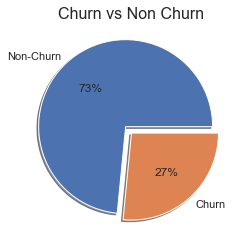

In [32]:
# Pie chart of churn
churn_rate = df.Churn.value_counts() / len(df.Churn)
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%', shadow=True, explode=[0.1, 0])  
ax.set_title('Churn vs Non Churn', fontsize=16)

<b>27%</b> Chrun rate describes that the given data is a imbalanced dataset

### Analyising Numerical Features

Let's analyse two numerical features, Tenure, Monthly Charges and Total Charges wrt Churn.

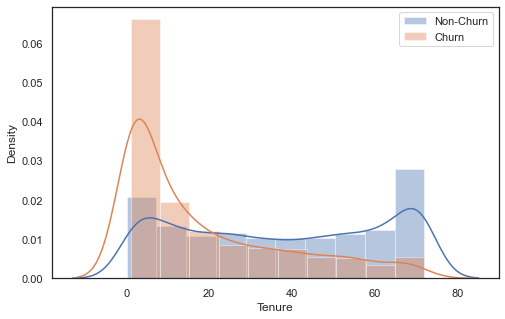

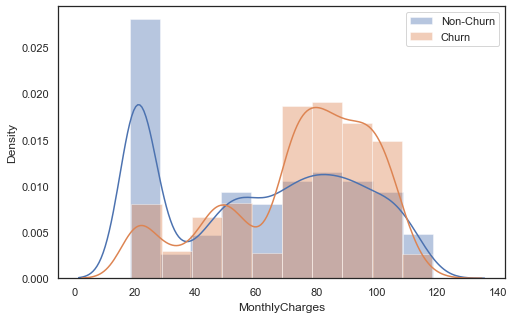

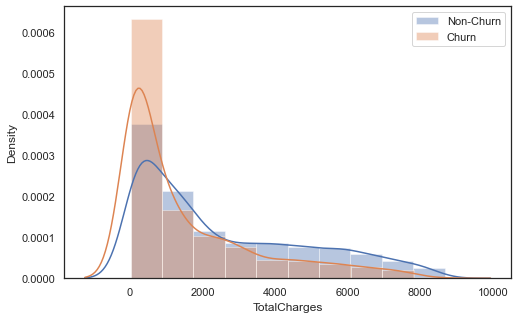

In [33]:
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,5))
    sns.distplot(df[df.Churn == 0][col],bins=10, label='Non-Churn',kde=True)
    sns.distplot(df[df.Churn == 1][col],bins=10, label='Churn',kde=True)
    plt.legend()

**Tenure**: Customer with less tenure is more likely to churn.

**Monthly Charges**: Customer with low monthly charges is less likely to churn; however, the churn trend between churn customers and non-churn customers gets similar as monthly charges go up.

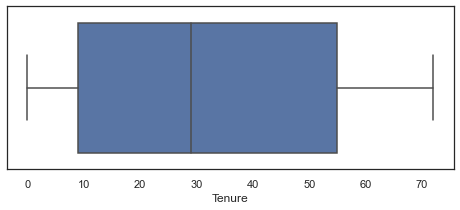

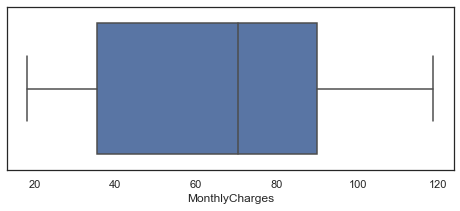

In [34]:
# check outliers
for col in ['Tenure', 'MonthlyCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(df[col])

**Outliers:** The box plots show there is no outliers in this data set.

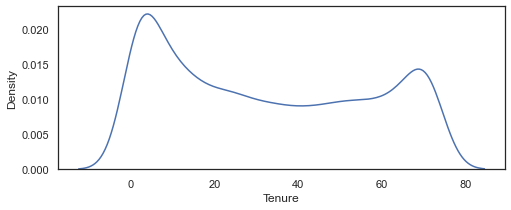

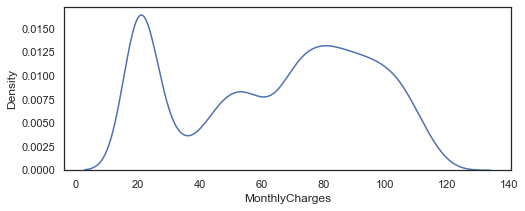

In [35]:
# distribution
for col in ['Tenure', 'MonthlyCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

 **Skewness:** The density plots show they are not normal distributions.

### Analyising categorical features

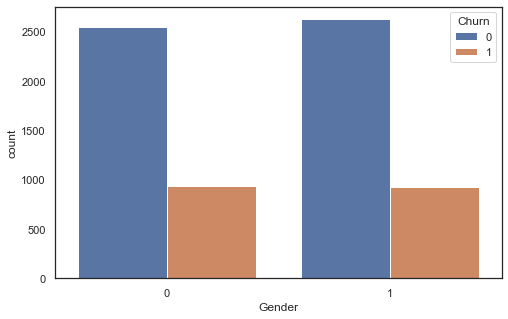

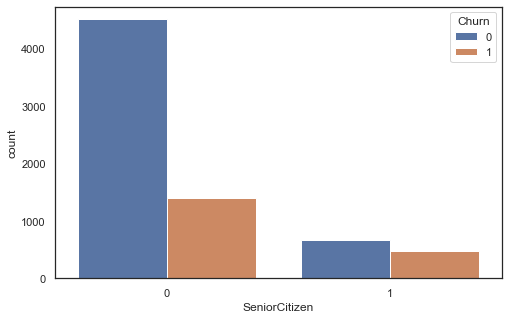

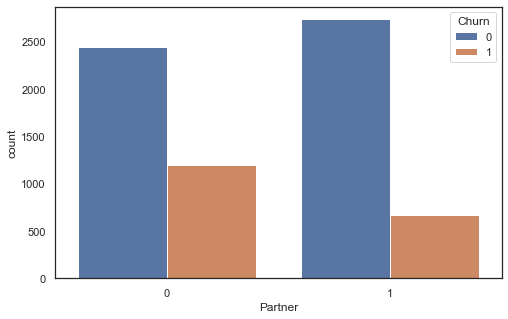

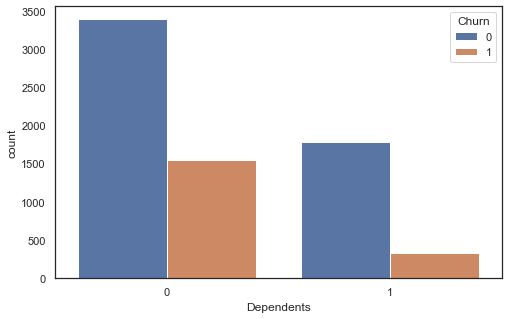

In [36]:
for col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.show()

**Gender:** The churn rate is similar between male and female, indicating Gender may not be a good predictor.

**Senior Citizen:** Customer who is senior citizen is more likely to churn.

**Partner:** Customer who does not have partner is more likely to churn.

**Dependents:** Customer who does have dependents is more likely to churn.

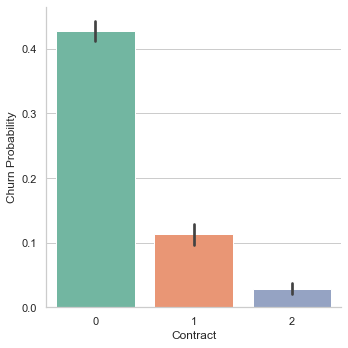

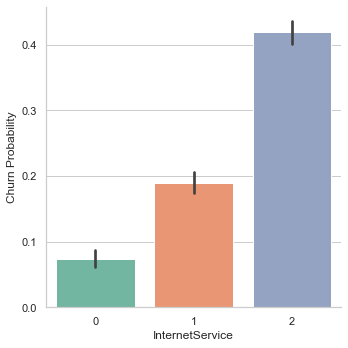

In [37]:
sns.set(style="whitegrid", palette="Set2")
g1=sns.catplot(x="Contract", y="Churn", data=df,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=df,kind="bar")
g2.set_ylabels("Churn Probability")

Having month-to-month contract and fiber obtic internet have a really huge effect on churn probability.

### Correlation of Churn with other attributes

In [38]:
df.corr()['Churn'].sort_values()

Contract                    -0.396713
Tenure                      -0.352229
TotalCharges                -0.199428
OnlineSecurity              -0.171226
TechSupport                 -0.164674
Dependents                  -0.164221
Partner                     -0.150448
Credit card (automatic)     -0.134302
Bank transfer (automatic)   -0.117937
Mailed check                -0.091683
OnlineBackup                -0.082255
DeviceProtection            -0.066160
Gender                      -0.008612
PhoneService                 0.011942
MultipleLines                0.040102
StreamingMovies              0.061382
StreamingTV                  0.063228
SeniorCitizen                0.150889
PaperlessBilling             0.191825
MonthlyCharges               0.193356
Electronic check             0.301919
InternetService              0.316846
Churn                        1.000000
Name: Churn, dtype: float64

Customers having month-to-month contract, having fiber optic internet service and using electronic payment are tend to churn more whereas people having two-year contract and having internet service are tend to not churn.

<AxesSubplot:>

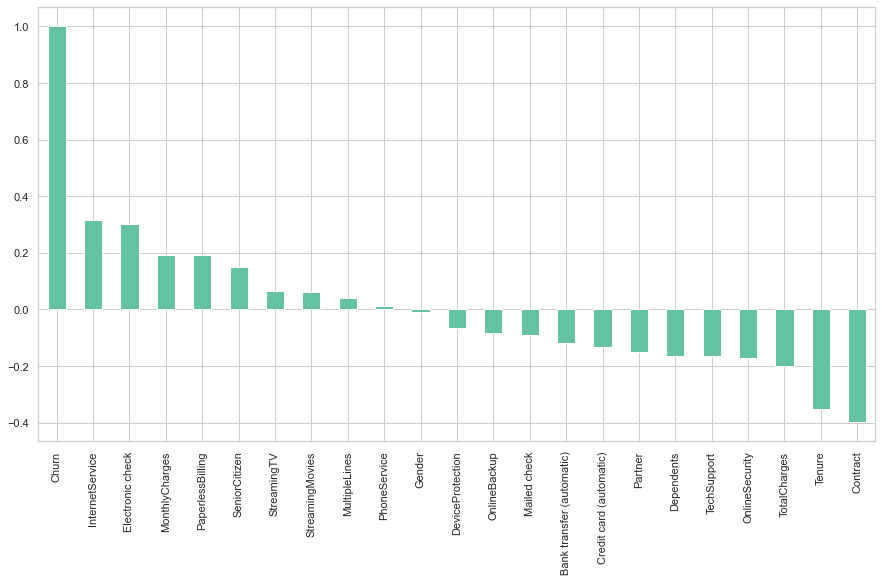

In [39]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn

### Scaling and Splitting data

#### Scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

#### Splitting
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
* <b>Train Dataset:</b> Used to fit the machine learning model.
* <b>Test Dataset:</b> Used to evaluate the fit machine learning model.

In [40]:
y = df['Churn'] # target column
X = df.drop('Churn', axis = 1) # all the other columns except churn

In [41]:
# Scaling
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [42]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Machine Learning Models

### KNN - K Nearest Neighbours

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)
print("KNN accuracy according to K=3 is :",knn.score(X_test,y_test))

KNN accuracy according to K=3 is : 0.7397065783246569


We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. So that we can find the optimal K value.

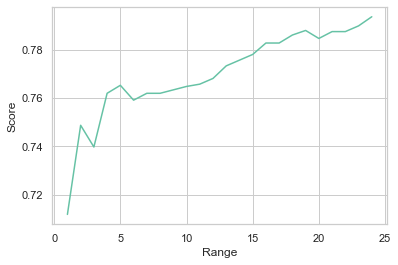

In [44]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see above, if we use K = 21, then we get maximum score of %78.2

In [45]:
knn_model = KNeighborsClassifier(n_neighbors = 21) #set K neighbor as 21
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy according to K=21 is :",accuracy_knn)

KNN accuracy according to K=21 is : 0.7875059157595835


### Logistic Regression Classification

In [46]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8130619971604354


### SVM(Support Vector Machine) Classification

In [47]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8054898248935163


### Naive Bayes Classification

In [48]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
accuracy_nb = nb_model.score(X_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.77520113582584


### Decision Tree Classification

In [67]:
# %%Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7311878845243729


### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(X_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(X_test,y_test))

Random Forest accuracy for 5 trees is : 0.7666824420255561


The tree number is set to 5 initially. But, to find the appropriate tree number. Let's try to find the best number with trying 1 to 50.

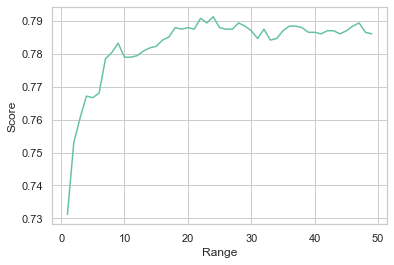

In [50]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As we can see, the highest accuracy is at n_estimators = 48.

In [51]:
rf_model = RandomForestClassifier(n_estimators = 48, random_state = 1) #set tree number as 48
rf_model.fit(X_train,y_train)
accuracy_rf = rf_model.score(X_test,y_test)
print("Random Forest accuracy for 33 trees is :",accuracy_rf)

Random Forest accuracy for 33 trees is : 0.7865593942262187


### Accuracies of ML Algorithms

| Algorithm |Acuuracy(%)  | 
| :---:   | :---: |
| Desicion Tree | 73.1  | 
   | Naive Bayes| 78.2   | 
| KNN (k=21)| 79.4   | 
| Random forest | 80.4  | 
| SVM | 80.7   | 
| Logistic Regression | 81.9   | 

From the above table, Logistic regression and SVC classificagtion algorithms have the highest accuracy.But as I mentioned before, our data is imbalanced. So it is important to look at the confusion matrix according to these two algorithms. With imbalanced datasets, the highest accuracy does not give the best model. Assume we have 1000 total rows, 10 rows are churn and 990 rows are non-churn. If we find all these 10 churn rows as non-churn, then the accuracy will be still %99. Althogh it is a wrong model, if we do not look at the confusion matrix, then we can not see the mistake.

Confusion matrix gives us FN(false negative), FP(false positive), TN(true negative) and TP(true positive) values.

![](https://drive.google.com/uc?export=view&id=1Ks14UX9YOnXvSVZx4ucfU1bIgNpiYMdz)

Learn about confusion matrix - https://www.youtube.com/watch?v=Kdsp6soqA7o

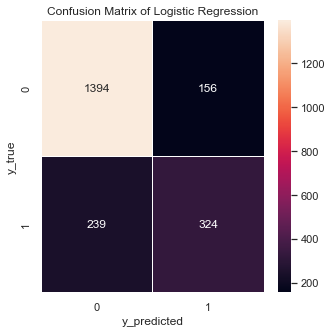

In [69]:
# %%Confusion Matrix libraries
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#for Logistic Regression
cm_lr = confusion_matrix(y_test,lr_model.predict(X_test))

# %% confusion matrix visualization
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

For logistic regression confusion matrix;
```
TN = 1394
FP = 156
FN = 239
TP = 324
```
This means; there are total 1394+156 = 1550 actual non-churn values and the algorithm predict 1394 of them as non-churn and 156 of them churn. Also there are total 239 + 324 = 563 actual churn values and the algorithm predict 239 of them as non-churn and 324 of them as churn.

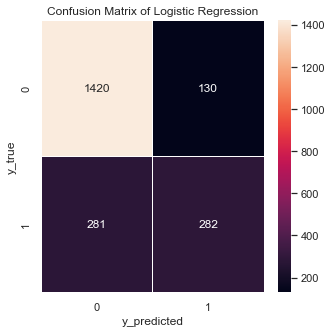

In [70]:
#for SVM
cm_lr = confusion_matrix(y_test,svc_model.predict(X_test))

# %% confusion matrix visualization
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

Acuracy should not be used as solely metric for imbalance datasets. There are some other metrics named as recall and precision.

![](https://drive.google.com/uc?export=view&id=1_4ZejjBAy3WUo-7OkS0hJpzBEaRr3otQ)

Sometimes we get high recall and low precision or vice versa. There is another metric that combines both precision and recall like below. We will use F1 score to identify the best algorithm score.

![](https://drive.google.com/uc?export=view&id=1sbGivo8TRDQr-iEBrM4HdHTuhVJD8kms)

Let's write a function that calculates and print both accuracy, recall, precision and weighted F1 score.

In [71]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)
    print()

In [72]:
# We can also use classification_report function from skleran library to show all these metrics.

report = classification_report(y_test, lr_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1550
           1       0.68      0.58      0.62       563

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



In [73]:
# Printing results for all ML algorithms

print_scores("Logistic Regression;",y_test, lr_model.predict(X_test))
print_scores("SVC;",y_test, svc_model.predict(X_test))
print_scores("KNN;",y_test, knn_model.predict(X_test))
print_scores("Naive Bayes;",y_test, nb_model.predict(X_test))
print_scores("Decision Tree;",y_test, dt_model.predict(X_test))
print_scores("Random Forest;",y_test, rf_model.predict(X_test))

Logistic Regression;
accuracy:  0.8130619971604354
precision:  0.675
recall:  0.5754884547069272
f1_score:  0.8080612082641923

SVC;
accuracy:  0.8054898248935163
precision:  0.6844660194174758
recall:  0.5008880994671403
f1_score:  0.794944985997414

KNN;
accuracy:  0.7875059157595835
precision:  0.6158536585365854
recall:  0.5381882770870338
f1_score:  0.7827345560527701

Naive Bayes;
accuracy:  0.77520113582584
precision:  0.5582010582010583
recall:  0.7495559502664298
f1_score:  0.7841853913779209

Decision Tree;
accuracy:  0.7311878845243729
precision:  0.49581239530988275
recall:  0.5257548845470693
f1_score:  0.7336368942882013

Random Forest;
accuracy:  0.7865593942262187
precision:  0.6308411214953271
recall:  0.47957371225577267
f1_score:  0.7764748626361726



## Conclusion:
* Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
* Logistic Regression gives the highest F1 Score, so it is the best model.
* Naive Bayes is the worst model because it gives the lowest F1 score.
* Sex has no impact on churn.
* People having month-to-month contract tend to churn more than people having long term conracts.
* As the tenure increases, the probability of churn decreases.
* As tmonthly charges increases, the probability of churn increases.